<a href="https://colab.research.google.com/github/Zheng7426/machine_learning_practice/blob/master/LongShortTermMemory_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000          # Number of words to consider as features
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)



Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 2s 0us/step
Pad sequences (samples x time)


In [5]:
input_test[0]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.5060 - acc: 0.7599 - val_loss: 0.4205 - val_acc: 0.8312
Epoch 2/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2891 - acc: 0.8848 - val_loss: 0.3415 - val_acc: 0.8746
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2324 - acc: 0.9114 - val_loss: 0.3442 - val_acc: 0.8560
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1993 - acc: 0.9275 - val_loss: 0.3679 - val_acc: 0.8478
Epoch 5/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1765 - acc: 0.9362 - val_loss: 0.3047 - val_acc: 0.8904
Epoch 6/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1521 - acc: 0.9469 - val_loss: 0.3768 - val_acc: 0.8622
Epoch 7/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1437 - acc: 0.9485 - val_loss: 0.4300 - val_acc:

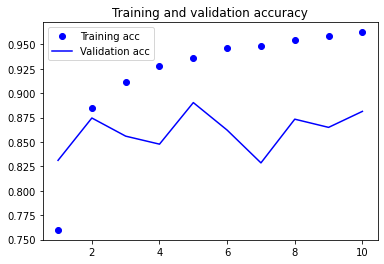

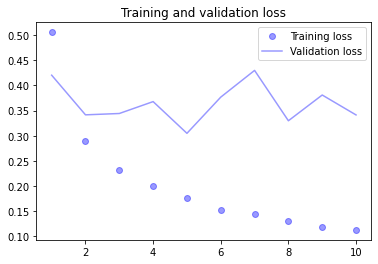

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', alpha=0.4, label='Training loss')
plt.plot(epochs, val_loss, 'b', alpha=0.4, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()